# Data Aggregation and Group Operations

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## GroupBy Mechanics

In [4]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.arange(5),
                   'data2' : np.arange(5)})
df

,key1,key2,data1,data2
0,a,one,0,0
1,a,two,1,1
2,b,one,2,2
3,b,two,3,3
4,a,one,4,4


In [8]:
# 通过series来分组
grouped = df['data1'].groupby(df['key1'])
print(type(grouped))
print(grouped.sum())
print(grouped.mean())

<class 'pandas.core.groupby.generic.SeriesGroupBy'>
key1
a    5
b    5
Name: data1, dtype: int32
key1
a    1.666667
b    2.500000
Name: data1, dtype: float64


In [9]:
grouped.mean()

key1
a    1.666667
b    2.500000
Name: data1, dtype: float64

In [10]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     2
      two     1
b     one     2
      two     3
Name: data1, dtype: int32

In [11]:
means.unstack()

key2,one,two
key1,,
a,2,1
b,2,3


In [15]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df2 = pd.DataFrame({'state': states, 'year': years, 'data': df['data1']})
df2
# [0, 1, 2, 3, 4]

,state,year,data
0,Ohio,2005,0
1,California,2005,1
2,California,2006,2
3,Ohio,2005,3
4,Ohio,2006,4


In [14]:
# 通过ndarray来分组
df['data1'].groupby([states, years]).mean()

California  2005    1.0
            2006    2.0
Ohio        2005    1.5
            2006    4.0
Name: data1, dtype: float64

In [16]:
df.groupby('key1').mean()
df.groupby(['key1', 'key2']).mean()

data1  data2
key1 key2              
a    one       2      2
     two       1      1
b    one       2      2
     two       3      3

In [17]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [18]:
df.groupby?

Signature:
df.groupby(
    by=None,
    axis=0,
    level=None,
    as_index: 'bool' = True,
    sort: 'bool' = True,
    group_keys: 'bool' = True,
    squeeze: 'bool' = <object object at 0x000001F3013303F0>,
    observed: 'bool' = False,
    dropna: 'bool' = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, or list of labels
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If an ndarray is passed, the
    values are used as-is to det

In [12]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
print(df)
group = df.groupby(['Animal'])
print(group.mean())
print()
print(group.groups) # dict {group name -> group labels}

   Animal  Max Speed
0  Falcon      380.0
1  Falcon      370.0
2  Parrot       24.0
3  Parrot       26.0
        Max Speed
Animal           
Falcon      375.0
Parrot       25.0

{'Falcon': [0, 1], 'Parrot': [2, 3]}


In [30]:
# 多级索引的group by, 可以指定level参数
>>> arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
...           ['Captive', 'Wild', 'Captive', 'Wild']]
>>> index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
>>> df = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]},
...                   index=index)
>>> print(df)
>>> print()
# >>> print(df.groupby(['Animal']).mean())
# >>> print()
# >>> print(df.groupby(['Type']).mean())
# >>> print()
>>> print(df.groupby(level=0).mean())
>>> print()
>>> print(df.groupby(level='Type').mean())

                Max Speed
Animal Type              
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

        Max Speed
Animal           
Falcon      370.0
Parrot       25.0

         Max Speed
Type              
Captive      210.0
Wild         185.0


In [7]:
# dropna
l = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]
df = pd.DataFrame(l, columns=["a", "b", "c"])
print(df)
print()
print(df.groupby(by=["b"]).sum())
print()
print(df.groupby(by=["b"], dropna=False).sum())

   a    b  c
0  1  2.0  3
1  1  NaN  4
2  2  1.0  3
3  1  2.0  2

     a  c
b        
1.0  2  3
2.0  2  5

     a  c
b        
1.0  2  3
2.0  2  5
NaN  1  4


In [8]:
l = [["a", 12, 12], [None, 12.3, 33.], ["b", 12.3, 123], ["a", 1, 1]]
df = pd.DataFrame(l, columns=["a", "b", "c"])
print(df)
print(df.groupby(by="a").sum())
print(df.groupby(by="a", dropna=False).sum())


      a     b      c
0     a  12.0   12.0
1  None  12.3   33.0
2     b  12.3  123.0
3     a   1.0    1.0
      b      c
a             
a  13.0   13.0
b  12.3  123.0
        b      c
a               
a    13.0   13.0
b    12.3  123.0
NaN  12.3   33.0


### Iterating Over Groups

In [5]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.arange(5),
                   'data2' : np.arange(5)})

print(df)

for name, group in df.groupby('key1'):
    print(name)         # key
    print(type(group))  # 被key切分的data frame
    print(group)

  key1 key2  data1  data2
0    a  one      0      0
1    a  two      1      1
2    b  one      2      2
3    b  two      3      3
4    a  one      4      4
a
<class 'pandas.core.frame.DataFrame'>
  key1 key2  data1  data2
0    a  one      0      0
1    a  two      1      1
4    a  one      4      4
b
<class 'pandas.core.frame.DataFrame'>
  key1 key2  data1  data2
2    b  one      2      2
3    b  two      3      3


In [6]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2  data1  data2
0    a  one      0      0
4    a  one      4      4
('a', 'two')
  key1 key2  data1  data2
1    a  two      1      1
('b', 'one')
  key1 key2  data1  data2
2    b  one      2      2
('b', 'two')
  key1 key2  data1  data2
3    b  two      3      3


In [9]:
pieces = dict(list(df.groupby('key1')))
print(pieces)
print()
pieces['b']

{'a':   key1 key2  data1  data2
0    a  one      0      0
1    a  two      1      1
4    a  one      4      4, 'b':   key1 key2  data1  data2
2    b  one      2      2
3    b  two      3      3}



,key1,key2,data1,data2
2,b,one,2,2
3,b,two,3,3


In [10]:
list(df.groupby('key1'))

[('a',
    key1 key2  data1  data2
  0    a  one      0      0
  1    a  two      1      1
  4    a  one      4      4),
 ('b',
    key1 key2  data1  data2
  2    b  one      2      2
  3    b  two      3      3)]

In [15]:
print(df)
grouped = df.groupby(df.dtypes, axis=1)

print(df.dtypes)       # int32, object
print()
print(list(grouped))   # 按照int32和object将数据分类

  key1 key2  data1  data2
0    a  one      0      0
1    a  two      1      1
2    b  one      2      2
3    b  two      3      3
4    a  one      4      4
key1     object
key2     object
data1     int32
data2     int32
dtype: object

[(dtype('int32'),    data1  data2
0      0      0
1      1      1
2      2      2
3      3      3
4      4      4), (dtype('O'),   key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one)]


In [13]:
for dtype, group in grouped:
    print(dtype)
    print(group)

int32
   data1  data2
0      0      0
1      1      1
2      2      2
3      3      3
4      4      4
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [22]:
g = df.groupby(['key1', 'key2'], axis=1)
df.groupby?
print(list(g))

[]


### Selecting a Column or Subset of Columns

In [6]:
print(df)
print()
print(list(df.groupby('key1')['data1']))

# df.groupby('key1')[['data2']]

  key1 key2  data1  data2
0    a  one      0      0
1    a  two      1      1
2    b  one      2      2
3    b  two      3      3
4    a  one      4      4

[('a', 0    0
1    1
4    4
Name: data1, dtype: int32), ('b', 2    2
3    3
Name: data1, dtype: int32)]


In [ ]:
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [8]:
df.groupby(['key1', 'key2'])[['data2']].count() # 返回结果为dataframe

data2
key1 key2       
a    one       2
     two       1
b    one       1
     two       1

In [10]:
s_grouped = df.groupby(['key1', 'key2'])['data2'] # 返回结果为series
s_grouped
s_grouped.count()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
Name: data2, dtype: int64

### Grouping with Dicts and Series

In [11]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,-0.204708,0.478943,-0.519439,-0.555730,1.965781
Steve,1.393406,0.092908,0.281746,0.769023,1.246435
Wes,1.007189,NaN,NaN,0.228913,1.352917
Jim,0.886429,-2.001637,-0.371843,1.669025,-0.438570
Travis,-0.539741,0.476985,3.248944,-1.021228,-0.577087


In [12]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [13]:
by_column = people.groupby(mapping, axis=1)
print(list(by_column))
by_column.sum()

[('blue',                c         d
Joe    -0.519439 -0.555730
Steve   0.281746  0.769023
Wes          NaN  0.228913
Jim    -0.371843  1.669025
Travis  3.248944 -1.021228), ('red',                a         b         e
Joe    -0.204708  0.478943  1.965781
Steve   1.393406  0.092908  1.246435
Wes     1.007189       NaN  1.352917
Jim     0.886429 -2.001637 -0.438570
Travis -0.539741  0.476985 -0.577087)]


,blue,red
Joe,-1.075169,2.240016
Steve,1.050769,2.732748
Wes,0.228913,2.360106
Jim,1.297183,-1.553778
Travis,2.227716,-0.639844


In [ ]:
map_series = pd.Series(mapping)
map_series
people.groupby(map_series, axis=1).count()

### Grouping with Functions

In [ ]:
people.groupby(len).sum()

In [ ]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

### Grouping by Index Levels

In [ ]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

In [ ]:
hier_df.groupby(level='cty', axis=1).count()

## Data Aggregation

In [ ]:
df
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

In [ ]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

In [ ]:
grouped.describe()

### Column-Wise and Multiple Function Application

In [3]:
tips = pd.read_csv('examples/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [ ]:
grouped = tips.groupby(['day', 'smoker'])

In [ ]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

In [ ]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

In [ ]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

In [ ]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

In [ ]:
result['tip_pct']

In [ ]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

In [ ]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

### Returning Aggregated Data Without Row Indexes

In [ ]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

## Apply: General split-apply-combine

In [7]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [4]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [9]:
list(tips.groupby('smoker'))

[('No',
       total_bill   tip smoker   day    time  size   tip_pct
  0         16.99  1.01     No   Sun  Dinner     2  0.059447
  1         10.34  1.66     No   Sun  Dinner     3  0.160542
  2         21.01  3.50     No   Sun  Dinner     3  0.166587
  3         23.68  3.31     No   Sun  Dinner     2  0.139780
  4         24.59  3.61     No   Sun  Dinner     4  0.146808
  ..          ...   ...    ...   ...     ...   ...       ...
  235       10.07  1.25     No   Sat  Dinner     2  0.124131
  238       35.83  4.67     No   Sat  Dinner     3  0.130338
  239       29.03  5.92     No   Sat  Dinner     3  0.203927
  242       17.82  1.75     No   Sat  Dinner     2  0.098204
  243       18.78  3.00     No  Thur  Dinner     2  0.159744
  
  [151 rows x 7 columns]),
 ('Yes',
       total_bill   tip smoker  day    time  size   tip_pct
  56        38.01  3.00    Yes  Sat  Dinner     4  0.078927
  58        11.24  1.76    Yes  Sat  Dinner     2  0.156584
  60        20.29  3.21    Yes  Sat  Dinn

In [10]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [11]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [14]:
result = tips.groupby('smoker')['tip_pct'].describe()
result
# result.unstack('smoker')

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [22]:
tips.groupby('smoker').apply(lambda x: x.min())


,total_bill,tip,smoker,day,time,size,tip_pct
smoker,,,,,,,
No,7.25,1.0,No,Fri,Dinner,1,0.056797
Yes,3.07,1.0,Yes,Fri,Dinner,1,0.035638


In [23]:
tips.groupby('smoker').apply(lambda x: x['total_bill'].min())

smoker
No     7.25
Yes    3.07
dtype: float64

### Suppressing the Group Keys

In [24]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


### Quantile and Bucket Analysis

<AxesSubplot:xlabel='data1'>

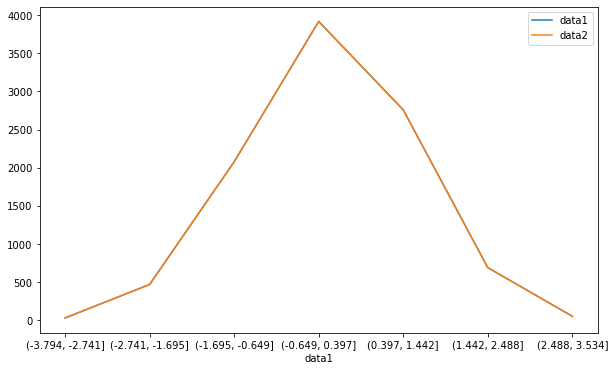

In [48]:
frame = pd.DataFrame({'data1': np.random.randn(10000),
                      'data2': np.random.randn(10000)})
quartiles = pd.cut(frame.data1, 7)
frame.groupby(quartiles).apply(lambda x: x.count()) # 可以对正态分布进行分组统计

# frame.groupby(quartiles).apply(lambda x: x.count()).plot()

In [30]:
frame = pd.DataFrame({'data1': np.arange(41),
                      'data2': np.arange(41)})
quartiles = pd.cut(frame.data1, 4)
# quartiles[:10]
quartiles

0     (-0.04, 10.0]
1     (-0.04, 10.0]
2     (-0.04, 10.0]
3     (-0.04, 10.0]
4     (-0.04, 10.0]
          ...      
36     (30.0, 40.0]
37     (30.0, 40.0]
38     (30.0, 40.0]
39     (30.0, 40.0]
40     (30.0, 40.0]
Name: data1, Length: 41, dtype: category
Categories (4, interval[float64]): [(-0.04, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0]]

In [34]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
grouped = frame.data2.groupby(quartiles)
# print(list(grouped))

# grouped.apply(get_stats).unstack()
grouped.apply(get_stats)

data1               
(-0.04, 10.0]  min       0.0
               max      10.0
               count    11.0
               mean      5.0
(10.0, 20.0]   min      11.0
               max      20.0
               count    10.0
               mean     15.5
(20.0, 30.0]   min      21.0
               max      30.0
               count    10.0
               mean     25.5
(30.0, 40.0]   min      31.0
               max      40.0
               count    10.0
               mean     35.5
Name: data2, dtype: float64

In [38]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
# list(grouped)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,0.0,4.0,5.0,2.0
1,5.0,8.0,4.0,6.5
2,9.0,12.0,4.0,10.5
3,13.0,16.0,4.0,14.5
4,17.0,20.0,4.0,18.5
5,21.0,24.0,4.0,22.5
6,25.0,28.0,4.0,26.5
7,29.0,32.0,4.0,30.5
8,33.0,36.0,4.0,34.5


### Example: Filling Missing Values with Group-Specific       Values

In [ ]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s
s.fillna(s.mean())

In [ ]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

In [ ]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data
data.groupby(group_key).mean()

In [ ]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

In [ ]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

### Example: Random Sampling and Permutation

In [4]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

In [5]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [ ]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

In [ ]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

In [ ]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

### Example: Group Weighted Average and Correlation

In [6]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

,category,data,weights
0,a,-0.204708,0.748907
1,a,0.478943,0.653570
2,a,-0.519439,0.747715
3,a,-0.555730,0.961307
4,b,1.965781,0.008388
5,b,1.393406,0.106444
6,b,0.092908,0.298704
7,b,0.281746,0.656411


In [ ]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

In [ ]:
close_px = pd.read_csv('examples/stock_px_2.csv', parse_dates=True,
                       index_col=0)
close_px.info()
close_px[-4:]

In [ ]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [ ]:
rets = close_px.pct_change().dropna()

In [ ]:
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

In [ ]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

### Example: Group-Wise Linear Regression

In [ ]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [ ]:
by_year.apply(regress, 'AAPL', ['SPX'])

## Pivot Tables and Cross-Tabulation

In [7]:
tips.pivot_table(index=['day', 'smoker'])

NameError: name 'tips' is not defined

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker')

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker', margins=True)

In [ ]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

In [ ]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                 columns='day', aggfunc='mean', fill_value=0)

### Cross-Tabulations: Crosstab

In [8]:
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [9]:
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [ ]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

In [ ]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion